In [21]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.preprocessing import Imputer

import seaborn as sns

In [22]:
!pwd

/Users/gracer/Google Drive/ABCD


In [39]:
data=pd.read_table('important_txt/4Kmeans.csv', sep=',')

In [40]:
data.head()

,src_subject_id,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,PDS,pds_f4_2_y,pds_f5_y,pds_m4_y,pds_m5_y,interview_age,gender,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean,sex
0,NDAR_INV00X2TBWJ,1,1,1,1.0,1.0,1.0,0.0,0.0,130,F,54.500000,68.500000,22.25,1089,1.0450,16.6165,1
1,NDAR_INV028D3ELL,3,3,1,1.8,1.0,1.0,0.0,0.0,109,F,57.500000,72.000000,23.50,667,1.3000,39.3810,1
2,NDAR_INV02H7G2T6,3,1,2,1.8,2.0,1.0,0.0,0.0,119,F,58.950000,96.600000,30.00,1528,1.1200,36.1655,1
3,NDAR_INV03NW0RKL,2,1,1,1.4,2.0,1.0,0.0,0.0,119,F,54.833333,65.266667,21.80,214,1.3485,39.3290,1
4,NDAR_INV05T64PXD,3,2,2,2.0,2.0,1.0,0.0,0.0,109,F,59.200000,94.800000,26.40,1,NaN,NaN,1


In [41]:
dudes = data[data['sex'] >= 0]
lady_dudes = data[data['sex'] >= 1]

In [42]:
lady_dudes.head()

,src_subject_id,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,PDS,pds_f4_2_y,pds_f5_y,pds_m4_y,pds_m5_y,interview_age,gender,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean,sex
0,NDAR_INV00X2TBWJ,1,1,1,1.0,1.0,1.0,0.0,0.0,130,F,54.500000,68.500000,22.25,1089,1.0450,16.6165,1
1,NDAR_INV028D3ELL,3,3,1,1.8,1.0,1.0,0.0,0.0,109,F,57.500000,72.000000,23.50,667,1.3000,39.3810,1
2,NDAR_INV02H7G2T6,3,1,2,1.8,2.0,1.0,0.0,0.0,119,F,58.950000,96.600000,30.00,1528,1.1200,36.1655,1
3,NDAR_INV03NW0RKL,2,1,1,1.4,2.0,1.0,0.0,0.0,119,F,54.833333,65.266667,21.80,214,1.3485,39.3290,1
4,NDAR_INV05T64PXD,3,2,2,2.0,2.0,1.0,0.0,0.0,109,F,59.200000,94.800000,26.40,1,NaN,NaN,1


In [43]:
dudes.head()

,src_subject_id,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,PDS,pds_f4_2_y,pds_f5_y,pds_m4_y,pds_m5_y,interview_age,gender,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean,sex
0,NDAR_INV00X2TBWJ,1,1,1,1.0,1.0,1.0,0.0,0.0,130,F,54.500000,68.500000,22.25,1089,1.0450,16.6165,1
1,NDAR_INV028D3ELL,3,3,1,1.8,1.0,1.0,0.0,0.0,109,F,57.500000,72.000000,23.50,667,1.3000,39.3810,1
2,NDAR_INV02H7G2T6,3,1,2,1.8,2.0,1.0,0.0,0.0,119,F,58.950000,96.600000,30.00,1528,1.1200,36.1655,1
3,NDAR_INV03NW0RKL,2,1,1,1.4,2.0,1.0,0.0,0.0,119,F,54.833333,65.266667,21.80,214,1.3485,39.3290,1
4,NDAR_INV05T64PXD,3,2,2,2.0,2.0,1.0,0.0,0.0,109,F,59.200000,94.800000,26.40,1,NaN,NaN,1


In [9]:
#tried K means

In [103]:
var_names=list(data.columns.values)

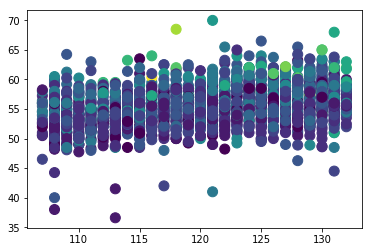

In [125]:
%matplotlib inline
plt.scatter(x=data['interview_age'].values, y=data['anthroheightcalc'].values, c=data['PDS'].values,s=100)

In [104]:
print(var_names)

['src_subject_id', 'pds_ht2_y', 'pds_skin2_y', 'pds_bdyhair_y', 'PDS', 'pds_f4_2_y', 'pds_f5_y', 'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender', 'anthroheightcalc', 'anthroweightcalc', 'anthro_waist_cm', 'hormone_scr_dhea_mean', 'hormone_scr_hse_mean', 'hormone_scr_ert_mean', 'pds_f6_y', 'menstrualcycle2_y', 'menstrualcycle2_y_dk', 'menstrualcycle3_y', 'menstrualcycle4_y', 'menstrualcycle5_y', 'menstrualcycle6_y', 'sex']


In [106]:
target_var=pd.DataFrame(data['PDS'].values)


In [107]:
f1=data['interview_age'].values
f10=data['pds_skin2_y'].values
f11=data['pds_bdyhair_y'].values
f12=data['pds_f4_2_y'].values
f13=data['pds_f5_y'].values
f14=data['pds_f6_y'].values
f16=data['pds_m4_y'].values
f17=data['pds_m5_y'].values
f19=data['menstrualcycle2_y'].values
f2=data['sex'].values
f3=data['anthroheightcalc'].values
f4=data['anthroweightcalc'].values
f5=data['anthro_waist_cm'].values
f6=data['hormone_scr_dhea_mean'].values
f7=data['hormone_scr_hse_mean'].values
f8=data['hormone_scr_ert_mean'].values
f9=data['pds_ht2_y'].values

In [108]:
X=np.matrix(zip(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f16,f17,f19))

In [109]:
X[1:5]

matrix([[  1.21000000e+02,   0.00000000e+00,   5.35000000e+01,
           8.14000000e+01,   2.52000000e+01,   1.00000000e+00,
                      nan,              nan,   2.00000000e+00,
           1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
           0.00000000e+00,              nan,   2.00000000e+00,
           2.00000000e+00,   0.00000000e+00],
        [  1.30000000e+02,   1.00000000e+00,   5.45000000e+01,
           6.85000000e+01,   2.22500000e+01,   1.08900000e+03,
           1.04500000e+00,   1.66165000e+01,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,              nan,   0.00000000e+00,
           0.00000000e+00,              nan],
        [  1.15000000e+02,   0.00000000e+00,   5.53500000e+01,
           8.92000000e+01,   2.50000000e+01,   1.31400000e+03,
           2.89200000e+01,              nan,   3.00000000e+00,
           1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
           0.00000000e+00,

In [110]:
X.shape

(2189, 17)

In [111]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)

0


In [112]:
transformed_values_scale.shape

(2189, 17)

In [113]:
indices = np.random.permutation(transformed_values_scale.shape[0])
training_idx, test_idx = indices[:1751], indices[1751:]
training, test = transformed_values_scale[training_idx,:], transformed_values_scale[test_idx,:]

In [114]:
training[1:10]

array([[  1.29015494e+00,  -8.37960198e-01,   1.24420778e-01,
         -1.03156525e-01,   7.79679385e-02,   1.08387280e+00,
          1.18137931e+00,   1.28722278e-13,   1.80194915e+00,
          1.77075883e+00,   3.49895136e-01,  -7.38044574e-01,
         -7.00996612e-01,  -3.16021574e-12,   8.66705685e-02,
          3.64002154e-01,  -1.29284925e-01],
       [  1.97693583e-01,   1.19337410e+00,   1.02352625e+00,
          1.30900035e+00,   1.37180115e+00,   2.06749743e+00,
         -1.19944732e+00,   8.05908544e-01,   6.58625471e-01,
         -8.22878562e-01,   3.49895136e-01,   1.23608932e+00,
          8.35857683e-01,  -3.16021574e-12,  -9.72743978e-01,
         -9.95104866e-01,  -7.12058912e-16],
       [ -1.71411379e+00,  -8.37960198e-01,   4.03453511e-01,
         -5.25347756e-01,   7.79679385e-02,   2.05929079e+00,
          1.20312075e+00,   1.28722278e-13,  -4.84698206e-01,
          4.73940136e-01,  -8.26633978e-01,  -7.38044574e-01,
         -7.00996612e-01,  -3.16021574e-12

In [115]:
kmeansTraining = KMeans(n_clusters=4, random_state = 5).fit(transformed_values)

In [116]:
kmeansTraining

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [117]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=100,400

In [118]:
new_df=pd.DataFrame(X)
new_df.columns=['interview_age','pds_skin2_y','pds_bdyhair_y','pds_f4_2_y','pds_f5_y','pds_f6_y',
'pds_m4_y','pds_m5_y','menstrualcycle2_y','sex','anthroheightcalc','anthroweightcalc','anthro_waist_cm',
'hormone_scr_dhea_mean','hormone_scr_hse_mean','hormone_scr_ert_mean','pds_ht2_y']
target_var.columns = ['Targets']

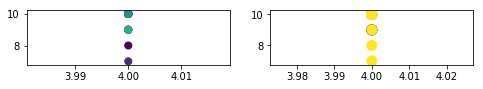

In [127]:
color_theme=sns.palplot(sns.color_palette("husl", 8))

plt.subplot(1,2,1)

plt.scatter(x=new_df.anthro_waist_cm, y=new_df.hormone_scr_dhea_mean, c=data['PDS'].values,s=50)

plt.subplot(1,2,2)

plt.scatter(x=new_df.anthro_waist_cm, y=new_df.hormone_scr_dhea_mean, c=kmeansTraining.labels_,s=100)

In [122]:
np.array(data['PDS'].values)

array([ 2. ,  1.8,  1. , ...,  1.6,  1.2,  1.6])

In [84]:
#example
iris = datasets.load_iris()
print(iris.target) #what they really are
y = pd.DataFrame(iris.target) #what they really are
#print(y)
X =scale(iris.data)
#print(iris.data)
variable_names=iris.feature_names
#print(variable_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [112]:
kmeansTraining = KMeans(n_clusters=4).fit(transformed_values)

In [113]:
kmeansTraining.labels_

array([2, 3, 2, ..., 0, 2, 2], dtype=int32)

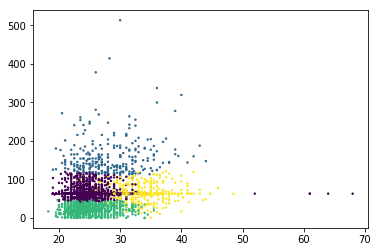

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(transformed_values[:, 4], transformed_values[:, 5],  c=kmeansTraining.labels_, s=2, cmap='viridis')

transformed_values[:, 2]

In [116]:
kmeansTraining

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
#trying affinity

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


In [ ]:
#ladies first

In [28]:
var_names=list(lady_dudes.columns.values)

In [29]:
print(var_names)

['src_subject_id', 'pds_ht2_y', 'pds_skin2_y', 'pds_bdyhair_y', 'PDS', 'pds_f4_2_y', 'pds_f5_y', 'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender', 'anthroheightcalc', 'anthroweightcalc', 'anthro_waist_cm', 'hormone_scr_dhea_mean', 'hormone_scr_hse_mean', 'hormone_scr_ert_mean', 'pds_f6_y', 'days_since_period', 'menstrualcycle2_y', 'menstrualcycle2_y_dk', 'menstrualcycle3_y', 'menstrualcycle4_y', 'menstrualcycle5_y', 'menstrualcycle6_y', 'sex']


In [44]:
labels_true=lady_dudes['PDS'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

In [58]:
X.shape

(903, 12)

In [53]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
#transformed_values_scale = scale(transformed_values)
np.argwhere(np.isnan(transformed_values))

0


array([], shape=(0, 2), dtype=int64)

In [59]:
transformed_values.shape

(903, 12)

In [81]:
# Compute Affinity Propagation
af = AffinityPropagation(preference=-100).fit(transformed_values)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 553
Homogeneity: 0.711
Completeness: 0.270
V-measure: 0.392
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.013


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
print(cluster_centers_indices)

#labels = af.labels_

#n_clusters_ = len(cluster_centers_indices)


[  5  10  24  38  77  81 100 118 124 153 156 174 180 196 212 226 252 294
 300 308 312 316 319 329 330 336 337 348 392 393 405 412 422 433 436 440
 460 467 472 473 479 490 511 514 552 557 568 574 598 612 613 658 669 706
 712 732 781 791 813 814 836 845 853 855 856 859 860 866 875 877 886 900]


In [62]:
cluster_center = X[cluster_centers_indices[k]]
print(cluster_center)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   2.00000000e+00
    1.00000000e+00   1.19000000e+02   5.31400000e+01   6.90000000e+01
    2.37500000e+01   2.12700000e+03   1.01050000e+00   3.13025000e+01]]


In [71]:
k

0

In [78]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    print(k)
    class_members = labels == k
    print(class_members)
    cluster_center = X[cluster_centers_indices[k]]
    print(cluster
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

0
[False False False False False  True False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False 

ValueError: x and y can be no greater than 2-D, but have shapes (2,) and (2, 1, 12)

In [65]:
n_clusters_ 

72

In [68]:
cluster_center.shape


(1, 12)

In [67]:
class_members

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [72]:
range(n_clusters_)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [74]:
zip(range(n_clusters_), colors)


[(0, 'r'),
 (1, 'c'),
 (2, 'm'),
 (3, 'y'),
 (4, 'k'),
 (5, 'b'),
 (6, 'g'),
 (7, 'r'),
 (8, 'c'),
 (9, 'm'),
 (10, 'y'),
 (11, 'k'),
 (12, 'b'),
 (13, 'g'),
 (14, 'r'),
 (15, 'c'),
 (16, 'm'),
 (17, 'y'),
 (18, 'k'),
 (19, 'b'),
 (20, 'g'),
 (21, 'r'),
 (22, 'c'),
 (23, 'm'),
 (24, 'y'),
 (25, 'k'),
 (26, 'b'),
 (27, 'g'),
 (28, 'r'),
 (29, 'c'),
 (30, 'm'),
 (31, 'y'),
 (32, 'k'),
 (33, 'b'),
 (34, 'g'),
 (35, 'r'),
 (36, 'c'),
 (37, 'm'),
 (38, 'y'),
 (39, 'k'),
 (40, 'b'),
 (41, 'g'),
 (42, 'r'),
 (43, 'c'),
 (44, 'm'),
 (45, 'y'),
 (46, 'k'),
 (47, 'b'),
 (48, 'g'),
 (49, 'r'),
 (50, 'c'),
 (51, 'm'),
 (52, 'y'),
 (53, 'k'),
 (54, 'b'),
 (55, 'g'),
 (56, 'r'),
 (57, 'c'),
 (58, 'm'),
 (59, 'y'),
 (60, 'k'),
 (61, 'b'),
 (62, 'g'),
 (63, 'r'),
 (64, 'c'),
 (65, 'm'),
 (66, 'y'),
 (67, 'k'),
 (68, 'b'),
 (69, 'g'),
 (70, 'r'),
 (71, 'c')]

In [75]:
col

'b'